In [11]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

In [12]:
from DB_connection.connection import PostgresConnection

In [13]:
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [14]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [15]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [16]:
# Calculate session frequency for each user
session_frequency = df.groupby('MSISDN/Number').size().reset_index(name='Session Frequency')

# Calculate duration of the session (already provided as 'Dur. (ms)')
# If you need total session duration per user, you can sum it up
session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Total Session Duration (ms)')

# Calculate session total traffic
session_traffic = df.groupby('MSISDN/Number').agg({
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()
session_traffic.columns = ['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']

# Merge all metrics into a single DataFrame
user_engagement = session_frequency.merge(session_duration, on='MSISDN/Number')
user_engagement = user_engagement.merge(session_traffic, on='MSISDN/Number')

# Display the final DataFrame with user engagement metrics
user_engagement

,MSISDN/Number,Session Frequency,Total Session Duration (ms),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,26716429.0,6.879252e+08
106852,3.379000e+10,1,140988.0,35732243.0,4.445751e+08
106853,3.197021e+12,1,877385.0,37295915.0,1.948281e+08
106854,3.370000e+14,1,253030.0,56652839.0,5.396350e+08


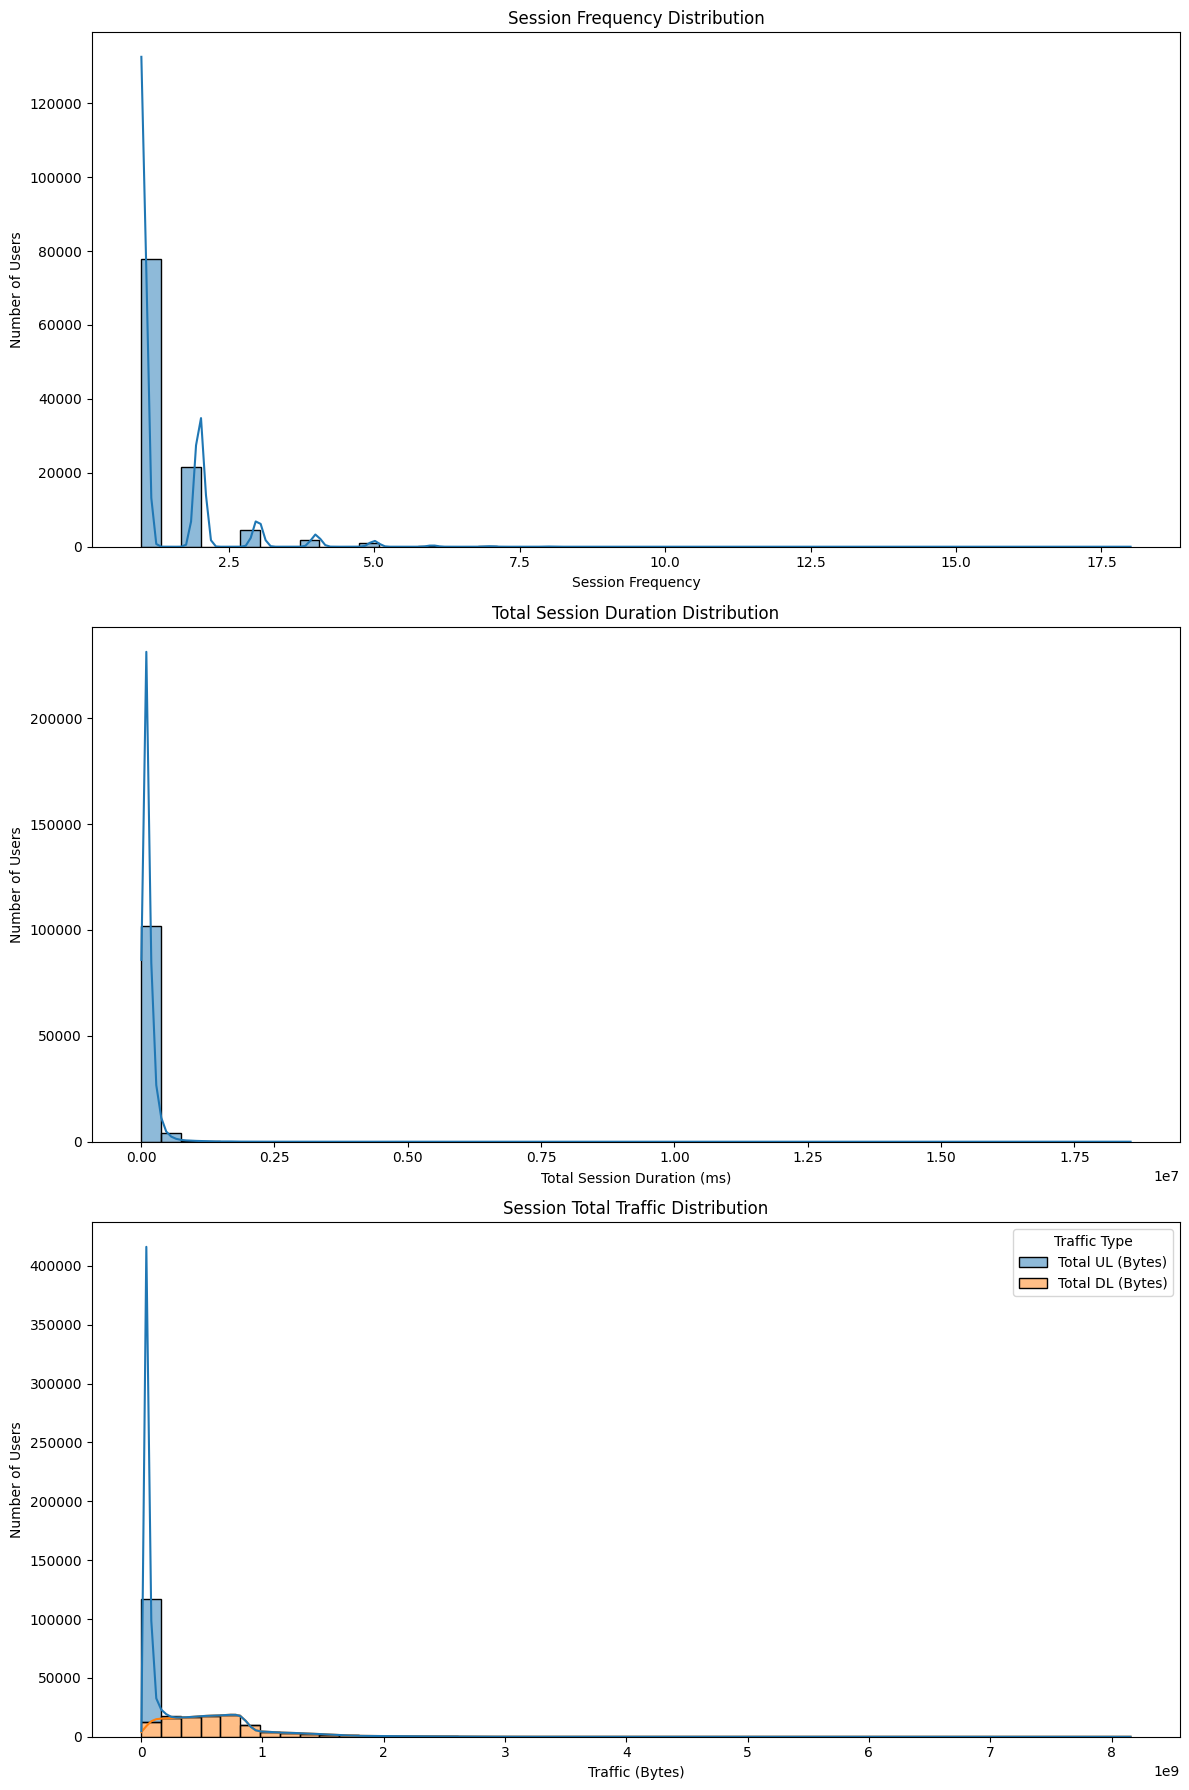

In [17]:
# Ensure 'Start' and 'End' columns are in datetime format if needed
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate metrics
session_frequency = df.groupby('MSISDN/Number').size().reset_index(name='Session Frequency')
session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Total Session Duration (ms)')
session_traffic = df.groupby('MSISDN/Number').agg({
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()
session_traffic.columns = ['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']

# Merge all metrics into a single DataFrame
user_engagement = session_frequency.merge(session_duration, on='MSISDN/Number')
user_engagement = user_engagement.merge(session_traffic, on='MSISDN/Number')

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot Session Frequency
sns.histplot(user_engagement['Session Frequency'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Session Frequency Distribution')
axs[0].set_xlabel('Session Frequency')
axs[0].set_ylabel('Number of Users')

# Plot Duration of the Session
sns.histplot(user_engagement['Total Session Duration (ms)'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Total Session Duration Distribution')
axs[1].set_xlabel('Total Session Duration (ms)')
axs[1].set_ylabel('Number of Users')

# Plot Session Total Traffic
user_engagement_melted = pd.melt(user_engagement, id_vars=['MSISDN/Number'], 
                                 value_vars=['Total UL (Bytes)', 'Total DL (Bytes)'],
                                 var_name='Traffic Type', value_name='Traffic (Bytes)')
sns.histplot(user_engagement_melted, x='Traffic (Bytes)', hue='Traffic Type', multiple='stack', bins=50, kde=True, ax=axs[2])
axs[2].set_title('Session Total Traffic Distribution')
axs[2].set_xlabel('Traffic (Bytes)')
axs[2].set_ylabel('Number of Users')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Getahun\AppData\Local\Temp\ipykernel_8952\2229438105.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engagement_users['Total Traffic (Bytes)'] = high_engagement_users[['Total UL (Bytes)', 'Total DL (Bytes)']].sum(axis=1)


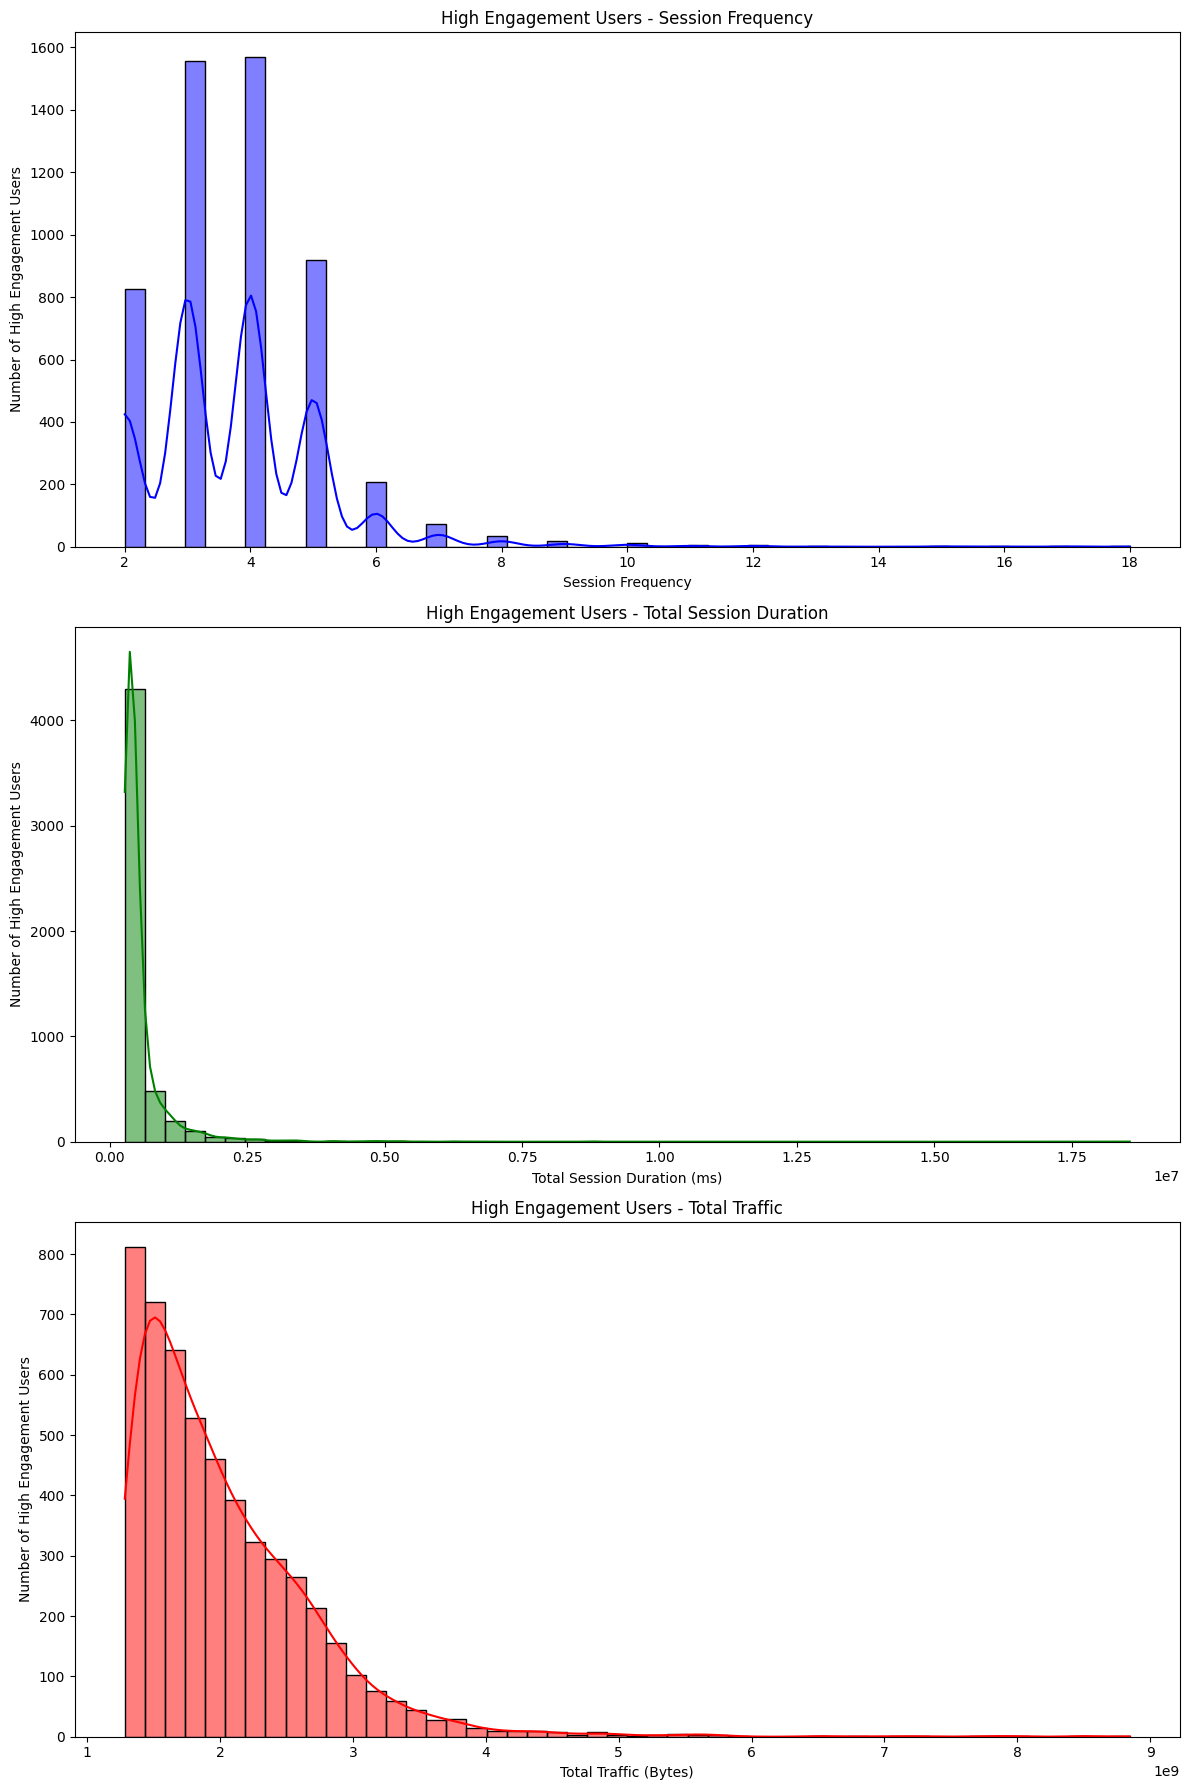

In [18]:
# Define high engagement threshold (e.g., top 10% of each metric)
freq_threshold = user_engagement['Session Frequency'].quantile(0.9)
duration_threshold = user_engagement['Total Session Duration (ms)'].quantile(0.9)
traffic_threshold = user_engagement[['Total UL (Bytes)', 'Total DL (Bytes)']].sum(axis=1).quantile(0.9)

# Filter high engagement users
high_engagement_users = user_engagement[
    (user_engagement['Session Frequency'] >= freq_threshold) &
    (user_engagement['Total Session Duration (ms)'] >= duration_threshold) &
    ((user_engagement[['Total UL (Bytes)', 'Total DL (Bytes)']].sum(axis=1)) >= traffic_threshold)
]

# Plot High Engagement Users

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot High Engagement Users by Session Frequency
sns.histplot(high_engagement_users['Session Frequency'], bins=50, kde=True, ax=axs[0], color='blue')
axs[0].set_title('High Engagement Users - Session Frequency')
axs[0].set_xlabel('Session Frequency')
axs[0].set_ylabel('Number of High Engagement Users')

# Plot High Engagement Users by Session Duration
sns.histplot(high_engagement_users['Total Session Duration (ms)'], bins=50, kde=True, ax=axs[1], color='green')
axs[1].set_title('High Engagement Users - Total Session Duration')
axs[1].set_xlabel('Total Session Duration (ms)')
axs[1].set_ylabel('Number of High Engagement Users')

# Plot High Engagement Users by Total Traffic
high_engagement_users['Total Traffic (Bytes)'] = high_engagement_users[['Total UL (Bytes)', 'Total DL (Bytes)']].sum(axis=1)
sns.histplot(high_engagement_users['Total Traffic (Bytes)'], bins=50, kde=True, ax=axs[2], color='red')
axs[2].set_title('High Engagement Users - Total Traffic')
axs[2].set_xlabel('Total Traffic (Bytes)')
axs[2].set_ylabel('Number of High Engagement Users')

# Adjust layout
plt.tight_layout()
plt.show()